In [9]:
import torch
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
train_df = pd.read_csv('train.csv')
train_df1 = pd.read_csv('train_replace.csv')
test_df = pd.read_csv('test.csv')
submit_df = pd.read_csv('sample_submission.csv')

In [11]:
train_df.head()

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
0,0,56,1,5882,0,38,0,185315.0104,0.844417,134,1,0,10,1
1,3,50,0,1767,1,35,0,371620.3666,0.837448,136,0,0,187,1
2,7,41,0,250,1,30,0,372810.2084,0.819996,139,1,0,29,1
3,11,47,0,582,1,20,0,185780.6482,0.870314,137,0,0,43,0
4,12,60,0,80,0,25,0,265096.3999,0.828112,136,1,0,213,0


In [12]:
train_df1.head()

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
0,-1.730502,-0.165343,1.184840,5.431709,-0.608164,0.118659,-0.557329,-1.169946,-0.263879,-0.834588,0.569652,-0.586588,-1.804444,1
1,-1.725310,-0.773222,-0.843996,1.195779,1.644294,-0.153287,-0.557329,1.173403,-0.273775,-0.247057,-1.755458,-0.586588,0.484081,1
2,-1.718386,-1.685040,-0.843996,-0.365802,1.644294,-0.606532,-0.557329,1.188369,-0.298556,0.634240,0.569652,-0.586588,-1.558783,1
3,-1.711462,-1.077161,-0.843996,-0.024045,1.644294,-1.513021,-0.557329,-1.164089,-0.227108,0.046709,-1.755458,-0.586588,-1.377770,0
4,-1.709731,0.239909,-0.843996,-0.540798,-0.608164,-1.059777,-0.557329,-0.166455,-0.287031,-0.247057,0.569652,-0.586588,0.820249,0


In [13]:
scaler = StandardScaler()
scaler.fit(test_df)
scaler.transform(test_df)
test_df_std = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)

In [230]:

def transform(train_df_std):
    for i in train_df_std['target']:
        if i > 0:
            print(1)
        else:
            print(0)
            
    df_array = np.array(transform(train_df_std))
    df_pd    = pd.DataFrame(df_array)

In [231]:
df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)

In [235]:
train_df1 = train_df
test_df1  = test_df

In [236]:
train_df1['data1'] = train_df1['serum_sodium'] / int(train_df1['serum_sodium'].sum()) * 100
train_df1['data2'] = train_df1['creatinine_phosphokinase'] / (train_df1['platelets'] + train_df1['serum_creatinine'] + train_df1['serum_sodium'])
train_df1['data3'] = train_df1['ejection_fraction'] / train_df1['serum_sodium']

In [237]:
test_df1['data1'] = test_df1['serum_sodium'] / int(test_df1['serum_sodium'].sum()) * 100
test_df1['data2'] = test_df1['creatinine_phosphokinase'] / (test_df1['platelets'] + test_df1['serum_creatinine'] + test_df1['serum_sodium'])
test_df1['data3'] = test_df1['ejection_fraction'] / test_df1['serum_sodium']

In [238]:
train_df1

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target,target1,data1,data2,data3
0,-1.730502,-0.165343,1.184840,5.431709,-0.608164,0.118659,-0.557329,-1.169946,-0.263879,-0.834588,0.569652,-0.586588,-1.804444,2.012587,NaN,-inf,-2.394498,-0.142177
1,-1.725310,-0.773222,-0.843996,1.195779,1.644294,-0.153287,-0.557329,1.173403,-0.273775,-0.247057,-1.755458,-0.586588,0.484081,2.012587,NaN,-inf,1.832410,0.620454
2,-1.718386,-1.685040,-0.843996,-0.365802,1.644294,-0.606532,-0.557329,1.188369,-0.298556,0.634240,0.569652,-0.586588,-1.558783,2.012587,NaN,inf,-0.240019,-0.956313
3,-1.711462,-1.077161,-0.843996,-0.024045,1.644294,-1.513021,-0.557329,-1.164089,-0.227108,0.046709,-1.755458,-0.586588,-1.377770,-0.496873,NaN,inf,0.017884,-32.392683
4,-1.709731,0.239909,-0.843996,-0.540798,-0.608164,-1.059777,-0.557329,-0.166455,-0.287031,-0.247057,0.569652,-0.586588,0.820249,-0.496873,NaN,-inf,0.771969,4.289605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.708921,0.239909,-0.843996,2.252960,-0.608164,-1.059777,-0.557329,-0.160814,-0.278794,-0.247057,0.569652,-0.586588,0.820249,-0.496873,NaN,-inf,-3.281014,4.289605
996,1.710652,-0.773222,1.184840,-0.536681,1.644294,0.299957,-0.557329,-0.279700,-0.456172,0.340474,0.569652,-0.586588,0.820249,-0.496873,NaN,inf,1.357316,0.880998
997,1.721038,-0.671909,1.184840,-0.539769,-0.608164,0.753202,1.794271,0.024135,-0.352902,0.046709,0.569652,-0.586588,-1.119180,-0.496873,NaN,inf,1.913674,16.125505
998,1.724499,1.860920,1.184840,-0.053898,-0.608164,1.206447,-0.557329,-1.141571,-0.247702,0.046709,0.569652,-0.586588,-0.446844,2.012587,NaN,inf,0.040145,25.829142


In [14]:
train_df1.describe()

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-1.200010e-11,4.700000e-11,2.640000e-10,-3.500000e-11,-4.400000e-10,-1.060000e-10,-2.510000e-10,-2.099999e-11,1.400000e-11,4.999998e-11,-9.000001e-11,3.200011e-11,3.300000e-11,0.198000
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,0.398692
min,-1.730502e+00,-1.887666e+00,-8.439957e-01,-5.994732e-01,-6.081636e-01,-2.056915e+00,-5.573293e-01,-1.762896e+00,-5.695014e-01,-6.122370e+00,-1.755458e+00,-5.865885e-01,-1.882021e+00,0.000000
25%,-8.706466e-01,-7.732218e-01,-8.439957e-01,-5.274160e-01,-6.081636e-01,-6.065320e-01,-5.573293e-01,-2.729528e-01,-3.294776e-01,-5.408226e-01,5.696519e-01,-5.865885e-01,-8.411948e-01,0.000000
50%,1.344266e-02,3.728323e-02,-8.439957e-01,-3.606552e-01,-6.081636e-01,-1.532873e-01,-5.573293e-01,-1.421967e-01,-2.639185e-01,-1.001741e-01,5.696519e-01,-5.865885e-01,4.582223e-01,0.000000
75%,8.871462e-01,3.412226e-01,1.184840e+00,-2.404547e-02,1.644294e+00,2.999573e-01,-5.573293e-01,2.029054e-02,-1.050226e-01,6.342401e-01,5.696519e-01,1.704773e+00,8.202490e-01,0.000000
max,1.727961e+00,2.772738e+00,1.184840e+00,7.468868e+00,1.644294e+00,3.019425e+00,1.794271e+00,6.865094e+00,1.130874e+01,2.690600e+00,5.696519e-01,1.704773e+00,1.751175e+00,1.000000


In [15]:
train_df1.head(3)

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
0,-1.730502,-0.165343,1.184840,5.431709,-0.608164,0.118659,-0.557329,-1.169946,-0.263879,-0.834588,0.569652,-0.586588,-1.804444,1
1,-1.725310,-0.773222,-0.843996,1.195779,1.644294,-0.153287,-0.557329,1.173403,-0.273775,-0.247057,-1.755458,-0.586588,0.484081,1
2,-1.718386,-1.685040,-0.843996,-0.365802,1.644294,-0.606532,-0.557329,1.188369,-0.298556,0.634240,0.569652,-0.586588,-1.558783,1


In [99]:
# 説明変数⇒X、目的変数⇒Y

X = train_df1[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 
               'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']].values
Y = train_df1['target'].values
XT = test_df_std[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 
                  'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']].values

In [100]:
train_df1['target'].value_counts()

0    802
1    198
Name: target, dtype: int64

In [101]:
print(X.shape)
print(Y.shape)

(1000, 12)
(1000,)


In [102]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)  # 25%がテスト用

# Tensorに変換
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64) 
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)


print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

#x_train = pd.DataFrame(x_train)
#x_train

x_train: torch.Size([700, 12])
y_train: torch.Size([700])
x_test: torch.Size([300, 12])
y_test: torch.Size([300])


In [103]:

from torch import nn

#nn.BatchNorm1d(128),      # BatchNorm2d ⇒ 4 or 3次元に変更

net = nn.Sequential(
    # ------- ここからコードを記述 -------
    nn.Linear(12, 64),
    nn.SELU(),
    nn.Linear(64, 32),
    nn.ELU(),
    nn.Linear(32, 16),
    nn.LeakyReLU(0.2),
    nn.PReLU(),
    nn.Linear(16, 8),
    nn.LeakyReLU(0.2),
    nn.PReLU(),
    nn.Linear(8, 8),
    nn.ReLU(),
    nn.Linear(8, 4),
    nn.ReLU(),            # Sigmoid()、Softmax(), Tanh(), SiLU()⇒Srwish関数, ReLU()
    nn.Linear(4, 2)

    # ------- ここまで -------
)
print(net)

Sequential(
  (0): Linear(in_features=12, out_features=64, bias=True)
  (1): SELU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ELU(alpha=1.0)
  (4): Linear(in_features=32, out_features=16, bias=True)
  (5): LeakyReLU(negative_slope=0.2)
  (6): PReLU(num_parameters=1)
  (7): Linear(in_features=16, out_features=8, bias=True)
  (8): LeakyReLU(negative_slope=0.2)
  (9): PReLU(num_parameters=1)
  (10): Linear(in_features=8, out_features=8, bias=True)
  (11): ReLU()
  (12): Linear(in_features=8, out_features=4, bias=True)
  (13): ReLU()
  (14): Linear(in_features=4, out_features=2, bias=True)
)


In [104]:
from torch import optim

# 交差エントロピー誤差関数
loss_fnc = nn.CrossEntropyLoss()
#loss_fnc = nn.MSELoss()

# 最適化アルゴリズム
optimizer = optim.Adam(net.parameters()) # ここにコードを記述

# 損失のログ
record_loss_train = []
record_loss_test  = []

# 1000エポック学習
for i in range(100):

    # 勾配を0に
    optimizer.zero_grad()
    
    # 順伝播
    x_train_r = net(x_train)
    x_test_r = net(x_test)
    
    # 誤差を求める
    loss_train = loss_fnc(x_train_r, y_train)
    loss_test = loss_fnc(x_test_r, y_test)
    record_loss_train.append(loss_train.item())
    record_loss_test.append(loss_test.item())

    # 逆伝播（勾配を求める）
    loss_train.backward()
    
    # パラメータの更新
    optimizer.step()

    if i%10 == 0:
        print("Epoch:", i, "Loss_Train:", loss_train.item(), "Loss_Test:", loss_test.item())

Epoch: 0 Loss_Train: 0.5671892166137695 Loss_Test: 0.5474750995635986
Epoch: 10 Loss_Train: 0.5554068684577942 Loss_Test: 0.5332967638969421
Epoch: 20 Loss_Train: 0.5506694912910461 Loss_Test: 0.5273401737213135
Epoch: 30 Loss_Train: 0.5460559725761414 Loss_Test: 0.5223223567008972
Epoch: 40 Loss_Train: 0.540911078453064 Loss_Test: 0.5168815851211548
Epoch: 50 Loss_Train: 0.5343859791755676 Loss_Test: 0.5108602643013
Epoch: 60 Loss_Train: 0.5255244970321655 Loss_Test: 0.5042693614959717
Epoch: 70 Loss_Train: 0.514259934425354 Loss_Test: 0.4994809329509735
Epoch: 80 Loss_Train: 0.5017799735069275 Loss_Test: 0.49582788348197937
Epoch: 90 Loss_Train: 0.4839227795600891 Loss_Test: 0.48441269993782043


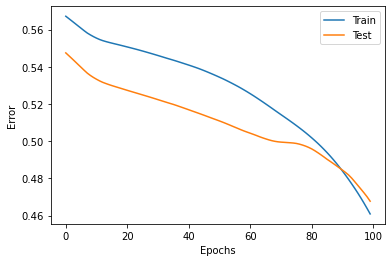

In [105]:

import matplotlib.pyplot as plt

plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [106]:
x_test_r = net(x_test)
count = (x_test_r.argmax(1) == y_test).sum().item()
print("正解率:", str(count/len(x_test_r)*100) + "%")

正解率: 81.66666666666667%


In [107]:
y_test.shape

torch.Size([300])

In [108]:
x_train_r.shape

torch.Size([700, 2])

In [109]:
x_test_r.shape

torch.Size([300, 2])

In [110]:
data = XT  # 提出ファイル
# 結果
x_pred = np.array(data)                             # numpy化
# 予測
x_pred1 = torch.tensor(x_pred, dtype=torch.float32) # numpy⇒torch.float型に変更
x_pred2 = net(x_pred1)                              # netモデルの学習データを反映
x_pred3 = x_pred2.argmax(1)                         # argmaxで0 or 1に分類
y_pred = x_pred3.detach().numpy()                   # torch.float型⇒numpy化に変更
y_pred.shape

(1000,)

In [111]:
Submit = test_df.loc[:,["id"]]
print(len(Submit))

1000


In [112]:
len(y_pred)

1000

In [113]:
Submit['pred'] = y_pred

In [114]:
Submit['pred'].value_counts()

0    886
1    114
Name: pred, dtype: int64

In [65]:
Submit

,id,pred
0,1,0
1,2,1
2,4,0
3,5,0
4,6,0
...,...,...
995,1992,0
996,1993,0
997,1995,0
998,1997,0


In [945]:
Submit.to_csv("submit_14.csv", index=False, header=False)

In [211]:
# 補足コード

# tensor⇒numpy

#a = torch.tensor([[1,2],[3,4]])
#pred = x_test_r.detach().numpy()
#b = a.numpy()
#print(b)

# numpy⇒tensor
#c = torch.from_numpy(b)
#print(c)


# 予測結果をtensor型⇒numpy化
#x_test_r = net(x_test)
#test_pred = x_test_r.detach().numpy()
#test_pred = np.argmax(test_pred, axis=1)
#test_pred = pd.DataFrame(test_pred)
#test_pred
#test_pred.value_counts()